In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from xgboost import XGBClassifier as xgbc
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
import optuna

In [2]:
df = pd.read_csv("C:\\Users\\Akarshan Vaibhav\\Downloads\\credit_score_classification\\train.csv", low_memory=False)

In [3]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
ID,0x1602,0x1603,0x1604,0x1605,0x1606,0x1607,0x1608,0x1609,0x160e,0x160f,...,0x25fe0,0x25fe1,0x25fe6,0x25fe7,0x25fe8,0x25fe9,0x25fea,0x25feb,0x25fec,0x25fed
Customer_ID,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0x21b1,CUS_0x21b1,...,CUS_0x8600,CUS_0x8600,CUS_0x942c,CUS_0x942c,CUS_0x942c,CUS_0x942c,CUS_0x942c,CUS_0x942c,CUS_0x942c,CUS_0x942c
Month,January,February,March,April,May,June,July,August,January,February,...,July,August,January,February,March,April,May,June,July,August
Name,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,NaN,Rick Rothackerj,Rick Rothackerj,...,Sarah McBridec,Sarah McBridec,Nicks,Nicks,Nicks,Nicks,Nicks,Nicks,Nicks,Nicks
Age,23,23,-500,23,23,23,23,23,28_,28,...,28,29,24,25,25,25,25,25,25,25
SSN,821-00-0265,821-00-0265,821-00-0265,821-00-0265,821-00-0265,821-00-0265,821-00-0265,#F%$D@*&8,004-07-5839,004-07-5839,...,031-35-0942,031-35-0942,078-73-5990,078-73-5990,078-73-5990,078-73-5990,078-73-5990,078-73-5990,078-73-5990,078-73-5990
Occupation,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,_______,Teacher,...,Architect,Architect,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic
Annual_Income,19114.12,19114.12,19114.12,19114.12,19114.12,19114.12,19114.12,19114.12,34847.84,34847.84,...,20002.88,20002.88,39628.99,39628.99_,39628.99,39628.99,39628.99,39628.99,39628.99,39628.99_
Monthly_Inhand_Salary,1824.843333,NaN,NaN,NaN,1824.843333,NaN,1824.843333,1824.843333,3037.986667,3037.986667,...,1929.906667,1929.906667,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833
Num_Bank_Accounts,3,3,3,3,3,3,3,3,2,2,...,10,10,4,4,4,4,4,4,4,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
df['Credit_Score'].value_counts() # There are no null values in credit score.

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [6]:
df['Credit_Mix'].value_counts() # since there are values with -  well use them as a predictive data set

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

In [7]:
# df_ = df.copy()

In [8]:
df_.drop(columns=(['ID', 'Customer_ID', 'Name', 'SSN', 'Type_of_Loan']), inplace=True) # we will drop unecessary columns

In [9]:
df_.T

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
Month,January,February,March,April,May,June,July,August,January,February,...,July,August,January,February,March,April,May,June,July,August
Age,23,23,-500,23,23,23,23,23,28_,28,...,28,29,24,25,25,25,25,25,25,25
Occupation,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,_______,Teacher,...,Architect,Architect,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic
Annual_Income,19114.12,19114.12,19114.12,19114.12,19114.12,19114.12,19114.12,19114.12,34847.84,34847.84,...,20002.88,20002.88,39628.99,39628.99_,39628.99,39628.99,39628.99,39628.99,39628.99,39628.99_
Monthly_Inhand_Salary,1824.843333,NaN,NaN,NaN,1824.843333,NaN,1824.843333,1824.843333,3037.986667,3037.986667,...,1929.906667,1929.906667,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833
Num_Bank_Accounts,3,3,3,3,3,3,3,3,2,2,...,10,10,4,4,4,4,4,4,4,4
Num_Credit_Card,4,4,4,4,4,4,4,4,4,4,...,8,8,6,6,6,6,6,6,6,6
Interest_Rate,3,3,3,3,3,3,3,3,6,6,...,29,29,7,7,7,7,7,5729,7,7
Num_of_Loan,4,4,4,4,4,4,4,4,1,1,...,5,5,2,2,2,2,2,2,2,2
Delay_from_due_date,3,-1,3,5,6,8,3,3,3,7,...,33,33,23,23,20,23,18,27,20,18


In [10]:
df_.isna().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

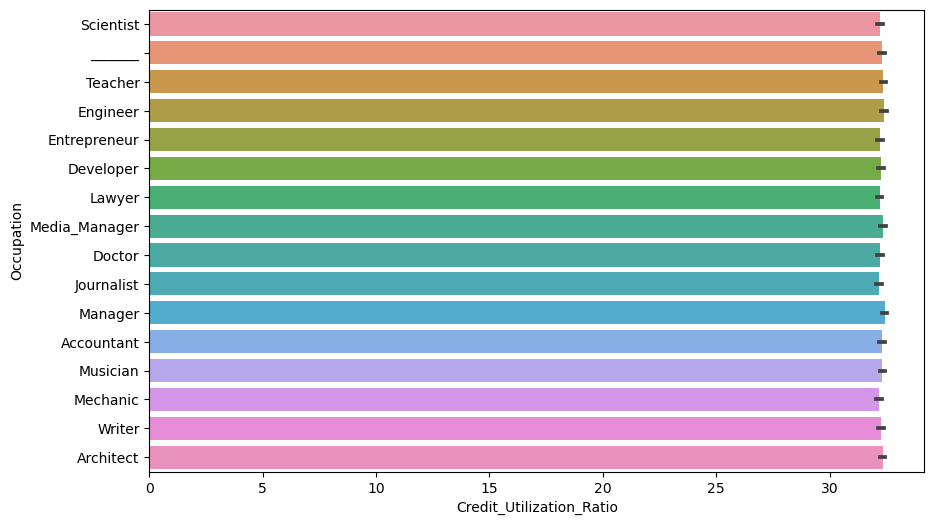

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(df_, y='Occupation', x='Credit_Utilization_Ratio',orient='h')
plt.show()

In [12]:
# not really a lot of difference between the credit utilization scores. 

In [13]:
df_['Occupation'].replace('_______', np.nan, inplace=True)

In [14]:
df_['Occupation'].isna().sum()

7062

In [15]:
# Annual income of lawyers and Scientists are higher than others

In [16]:
df_['Annual_Income'] = df_['Annual_Income'].str.replace('_', '')

In [17]:
df_['Annual_Income'] = pd.to_numeric(df_['Annual_Income'])

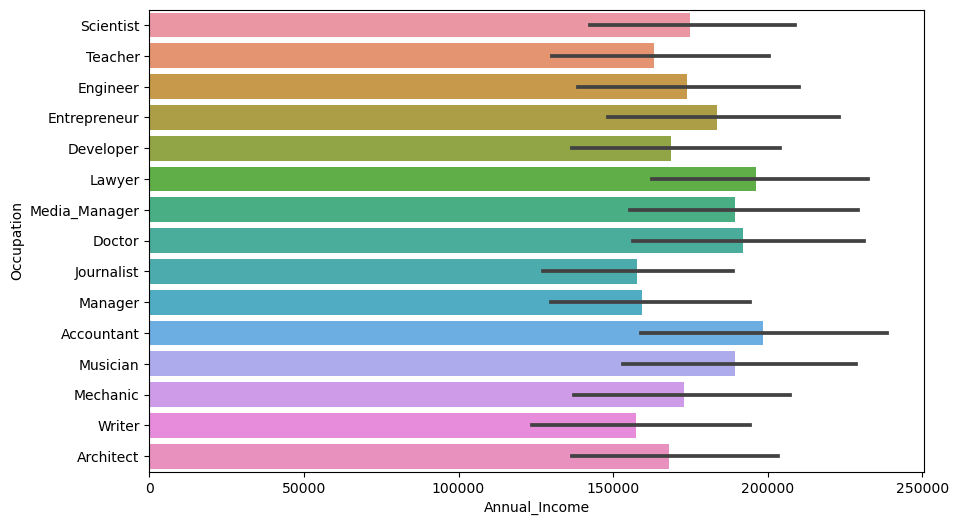

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(df_, y='Occupation', x='Annual_Income',orient='h')
plt.show()

In [19]:
def convert_to_months(x: str):
    
    if isinstance(x, str):
        split_data = x.split(' ')
        months = int(split_data[0]) * 12 + int(split_data[3])
        return months
    

In [20]:
df_['Credit_History_Age'].head(2)

0    22 Years and 1 Months
1                      NaN
Name: Credit_History_Age, dtype: object

In [21]:
df_['Credit_History_Age'] = df_['Credit_History_Age'].apply(convert_to_months)

In [22]:
def spent_value_payments(x: str):
    if isinstance(x, str):
        split_values = x.split('_')
        
        if len(split_values) >= 3:
            spent = split_values[0]
            value = split_values[2]
            return spent, value
        else:
            return np.nan, np.nan
    return np.nan, np.nan

### I have converted the column Payment_Behaviour into two columns Spent and Value_Payments

In [23]:
df_[['Spent', 'Value_Payments']] = df_['Payment_Behaviour'].apply(spent_value_payments).apply(pd.Series) 

In [24]:
df_.drop(columns=['Payment_Behaviour'], inplace=True)

In [25]:
df_.T

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
Month,January,February,March,April,May,June,July,August,January,February,...,July,August,January,February,March,April,May,June,July,August
Age,23,23,-500,23,23,23,23,23,28_,28,...,28,29,24,25,25,25,25,25,25,25
Occupation,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,NaN,Teacher,...,Architect,Architect,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic
Annual_Income,19114.12,19114.12,19114.12,19114.12,19114.12,19114.12,19114.12,19114.12,34847.84,34847.84,...,20002.88,20002.88,39628.99,39628.99,39628.99,39628.99,39628.99,39628.99,39628.99,39628.99
Monthly_Inhand_Salary,1824.843333,NaN,NaN,NaN,1824.843333,NaN,1824.843333,1824.843333,3037.986667,3037.986667,...,1929.906667,1929.906667,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833
Num_Bank_Accounts,3,3,3,3,3,3,3,3,2,2,...,10,10,4,4,4,4,4,4,4,4
Num_Credit_Card,4,4,4,4,4,4,4,4,4,4,...,8,8,6,6,6,6,6,6,6,6
Interest_Rate,3,3,3,3,3,3,3,3,6,6,...,29,29,7,7,7,7,7,5729,7,7
Num_of_Loan,4,4,4,4,4,4,4,4,1,1,...,5,5,2,2,2,2,2,2,2,2
Delay_from_due_date,3,-1,3,5,6,8,3,3,3,7,...,33,33,23,23,20,23,18,27,20,18


In [26]:
def replace_(x):
    if isinstance(x, str):
        return x.replace('_', '')
    return x

In [27]:
col_list_replace = ['Changed_Credit_Limit', 
                    'Num_of_Loan', 
                    'Age', 
                    'Outstanding_Debt', 
                    'Amount_invested_monthly', 
                    'Monthly_Balance', 
                    'Num_of_Delayed_Payment']

In [28]:
df_[col_list_replace] = df_[col_list_replace].applymap(replace_)

In [29]:
df_[col_list_replace] = df_[col_list_replace].apply(pd.to_numeric, errors='coerce')

In [30]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  int64  
 2   Occupation                92938 non-null   object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int64  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   float64
 11  Changed_Credit_Limit      97909 non-null   float64
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

In [31]:
df_['Credit_Mix'].value_counts() # i'll use knn imputer to predict the nan values for _ values

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

In [32]:
df_['Occupation'] = df_['Occupation'].fillna('Others')

In [33]:
# we will drop the na rows for spent and value payments columns since they have same nan values for their columns

In [34]:
df_ = df_.loc[(df_['Spent'].isna() == False) & (df_['Value_Payments'].isna() == False)]

In [35]:
df_.loc[:, 'Credit_Mix'] = df_['Credit_Mix'].replace('_', np.nan)

In [36]:
df_['Credit_Mix'].value_counts()

Credit_Mix
Standard    33707
Good        22491
Bad         17511
Name: count, dtype: int64

In [37]:
df_.isna().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       13842
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       6420
Changed_Credit_Limit         1942
Num_Credit_Inquiries         1806
Credit_Mix                  18691
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8341
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4132
Monthly_Balance              1105
Credit_Score                    0
Spent                           0
Value_Payments                  0
dtype: int64

In [38]:
df_.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,92400.0,1.097754e+02,6.807664e+02,-5.000000e+02,24.000000,33.000000,42.000000,8.698000e+03
Annual_Income,92400.0,1.767569e+05,1.434177e+06,7.005930e+03,19433.480000,37573.920000,72849.560000,2.419806e+07
Monthly_Inhand_Salary,78558.0,4.193008e+03,3.184528e+03,3.036454e+02,1623.729167,3089.149167,5964.883333,1.520463e+04
Num_Bank_Accounts,92400.0,1.707835e+01,1.173330e+02,-1.000000e+00,3.000000,6.000000,7.000000,1.798000e+03
Num_Credit_Card,92400.0,2.245826e+01,1.289530e+02,0.000000e+00,4.000000,5.000000,7.000000,1.499000e+03
Interest_Rate,92400.0,7.260130e+01,4.677205e+02,1.000000e+00,8.000000,13.000000,20.000000,5.797000e+03
Num_of_Loan,92400.0,2.961450e+00,6.194050e+01,-1.000000e+02,1.000000,3.000000,5.000000,1.496000e+03
Delay_from_due_date,92400.0,2.106891e+01,1.487853e+01,-5.000000e+00,10.000000,18.000000,28.000000,6.700000e+01
Num_of_Delayed_Payment,85980.0,3.110463e+01,2.275384e+02,-3.000000e+00,9.000000,14.000000,18.000000,4.397000e+03
Changed_Credit_Limit,90458.0,1.039920e+01,6.790016e+00,-6.490000e+00,5.340000,9.420000,14.880000,3.697000e+01


In [39]:
def cap_outliers(series):
    
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    return np.clip(series, lower_bound, upper_bound)

In [41]:
df_.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score', 'Spent',
       'Value_Payments'],
      dtype='object')

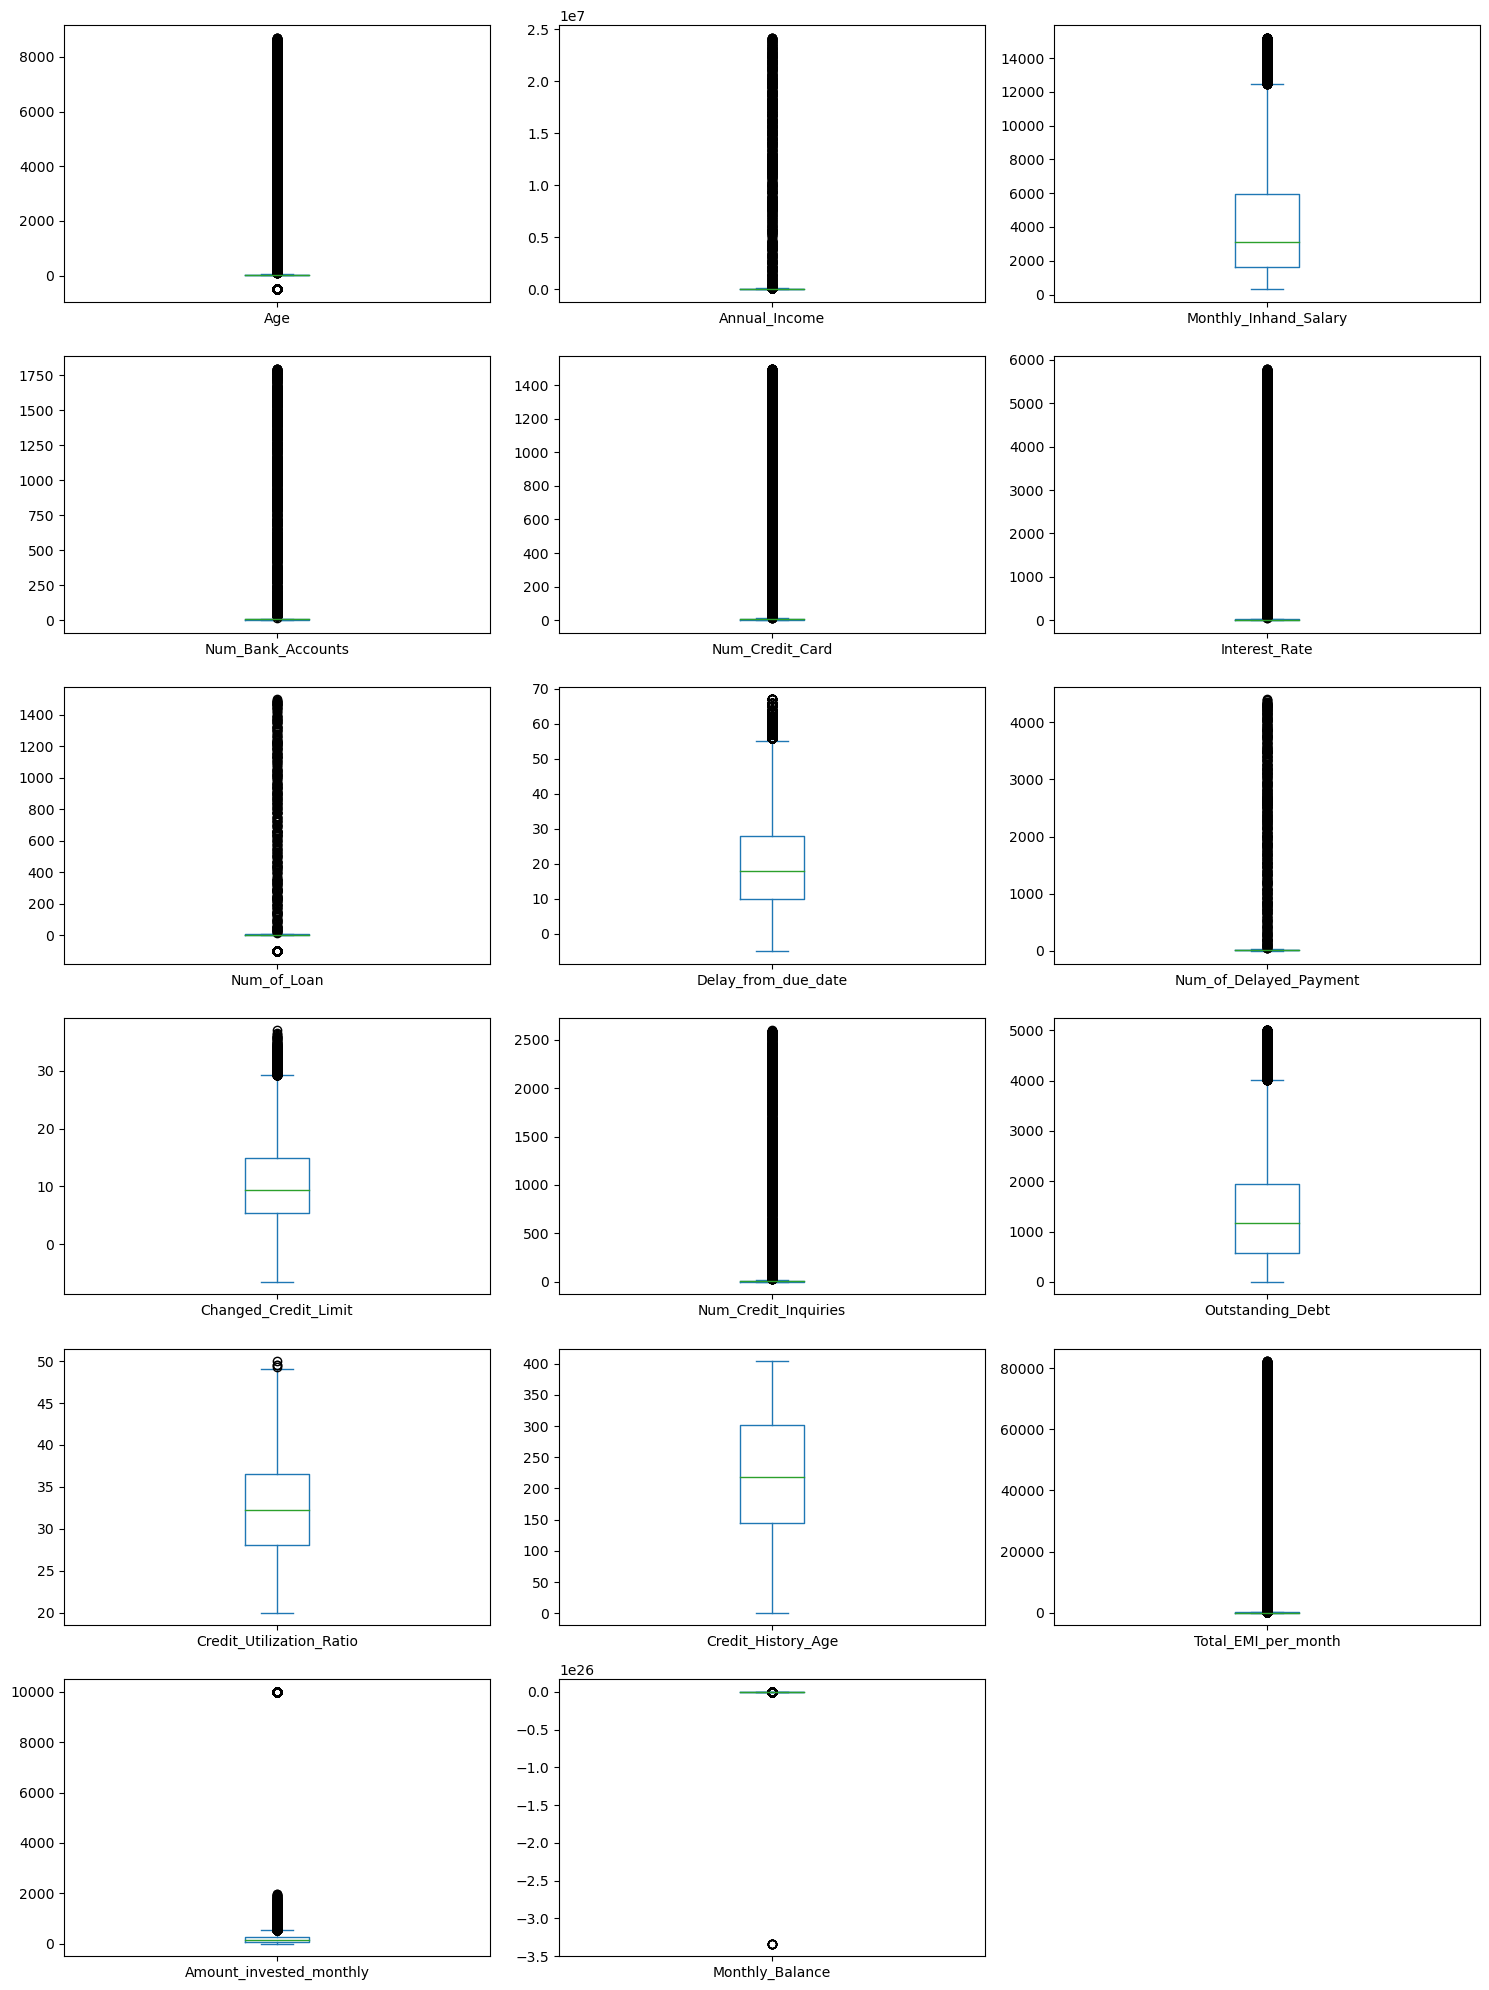

In [42]:
cols = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance']

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15,20))
axes = axes.flatten()

for i,col in enumerate(cols):
    df_[col].plot(kind='box', ax=axes[i])

axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

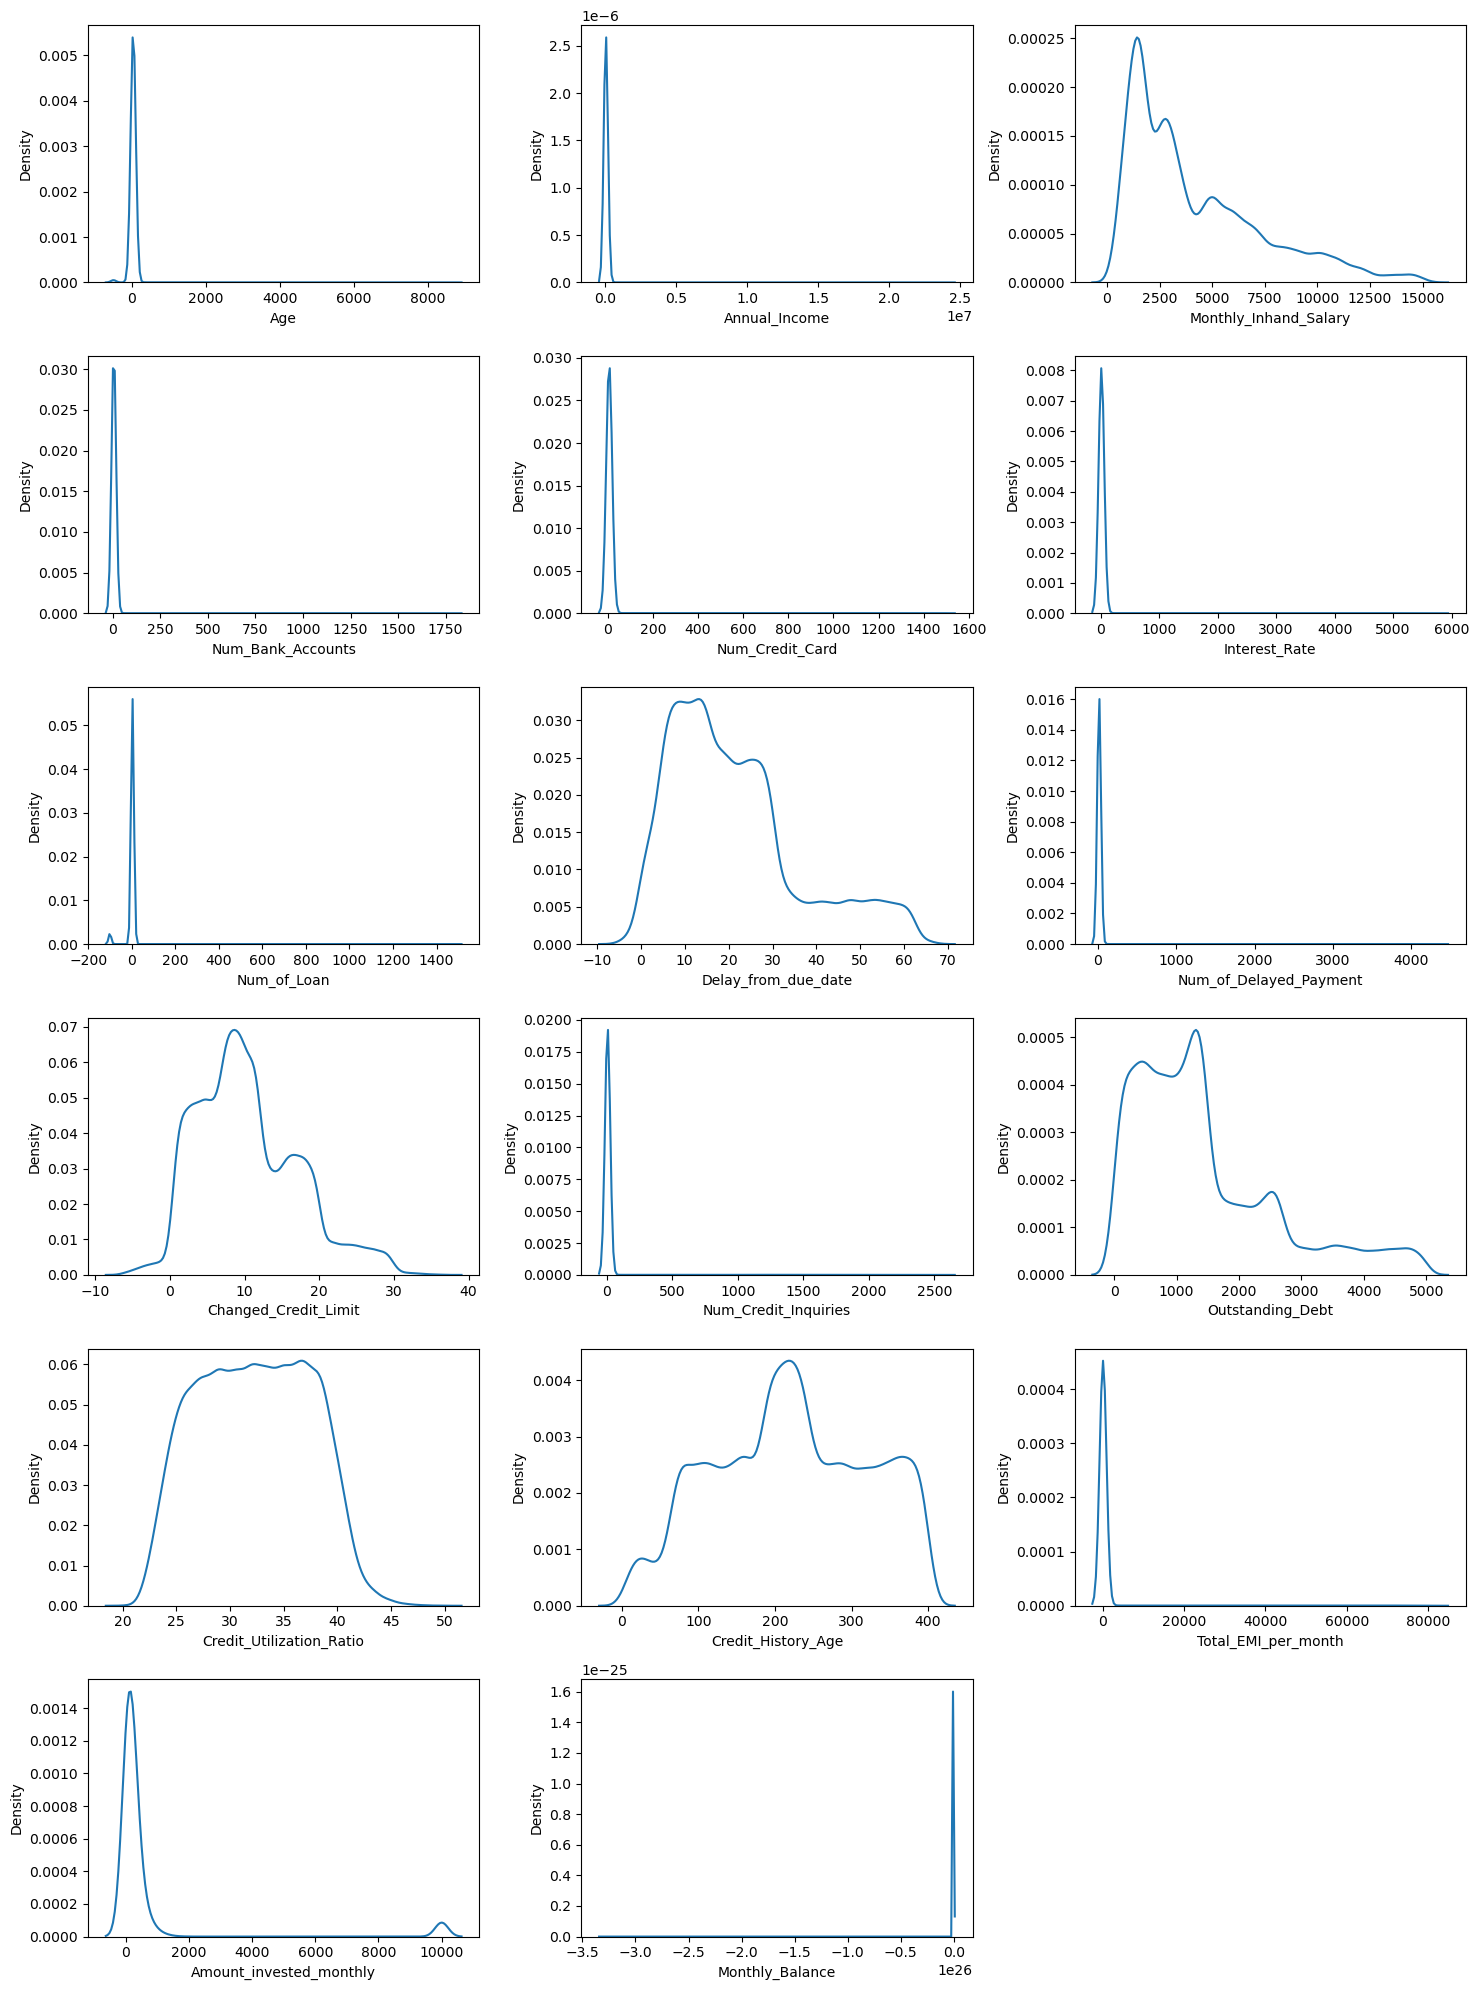

In [43]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15,20))
axes = axes.flatten()

for i,col in enumerate(cols):
    if col in df_.columns:
        sns.kdeplot(df_[col], ax=axes[i])
    else:
        axes[i].set_visible(False)

axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

C:\Users\Akarshan Vaibhav\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


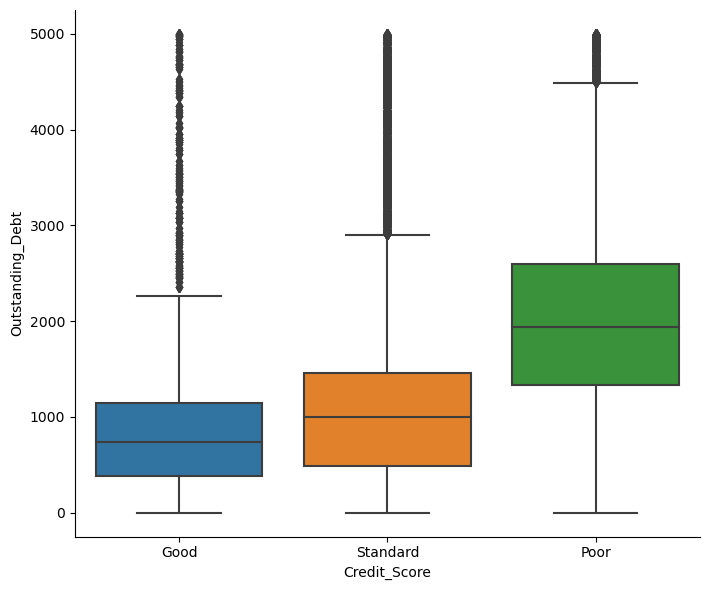

In [45]:
sns.catplot(data=df_, y='Outstanding_Debt', x='Credit_Score', kind='box', height=6, aspect=1.2)
plt.show()

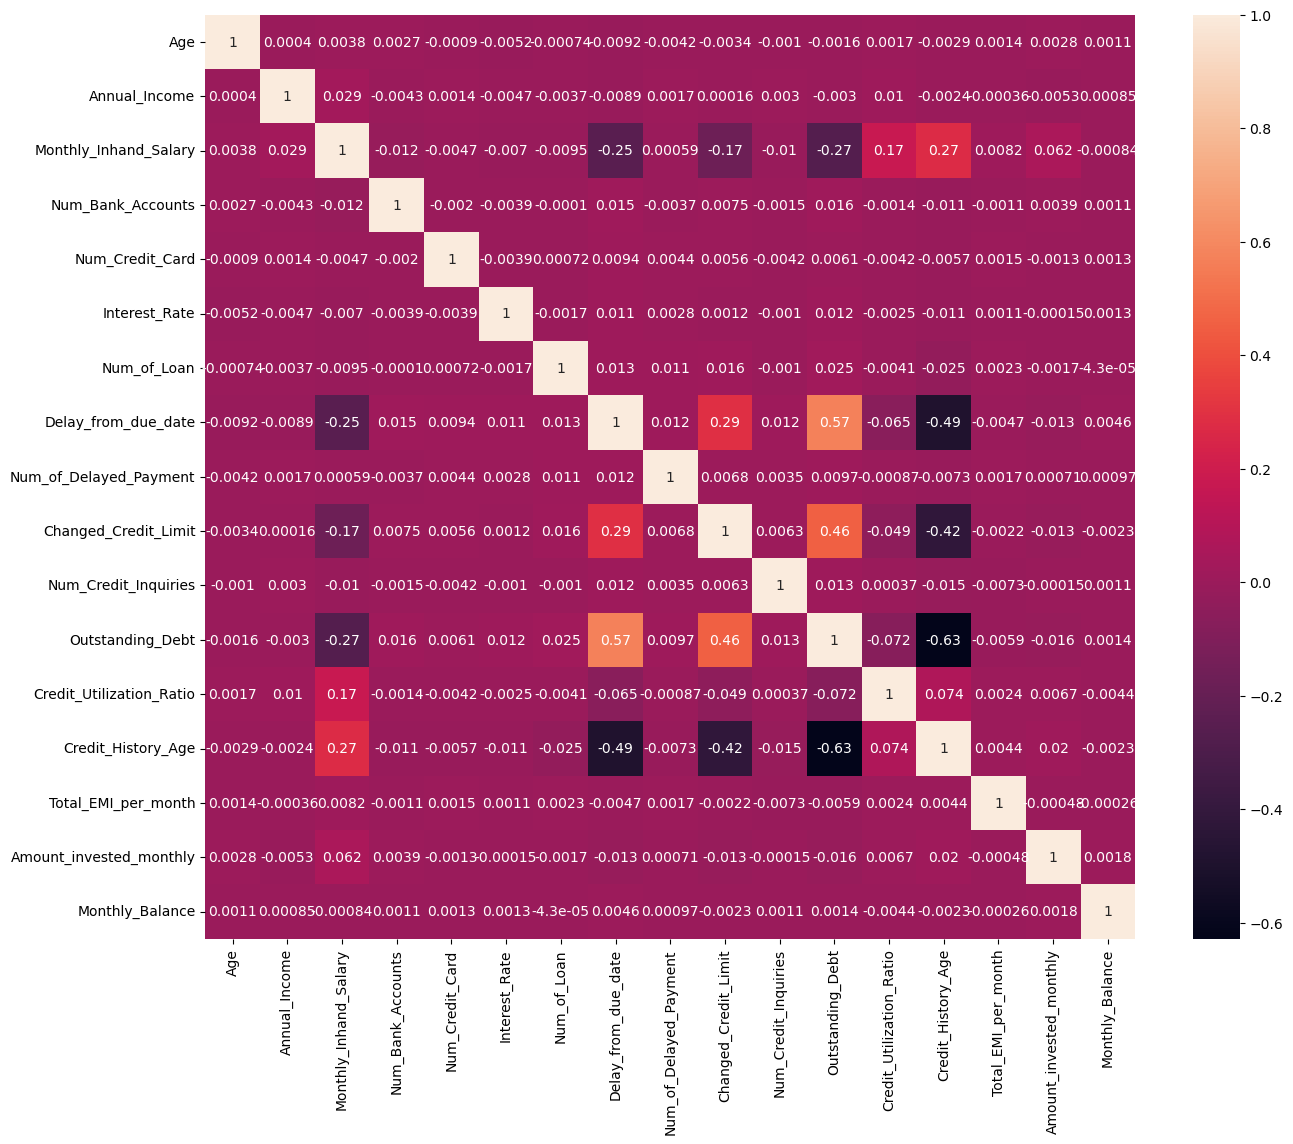

In [46]:
plt.figure(figsize=(15,12))
sns.heatmap(df_.select_dtypes(include=['float64', 'int64']).corr(), annot=True)
plt.show()

In [47]:
df_ = df_[(df_['Age'] > 0) & (df_['Age'] <= 100)]

<Axes: >

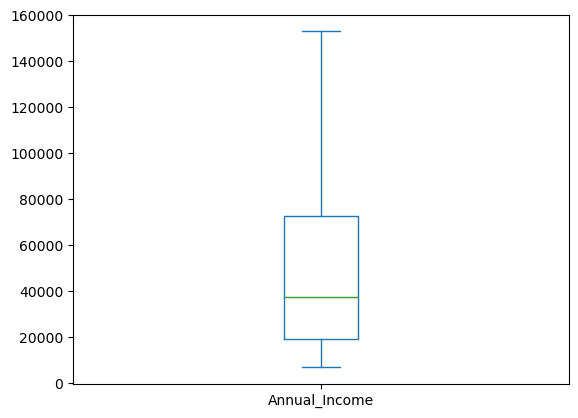

In [48]:
cap_outliers(df_['Annual_Income']).plot(kind='box')

In [49]:
df_.loc[:,'Annual_Income'] = cap_outliers(df_['Annual_Income'])

<Axes: >

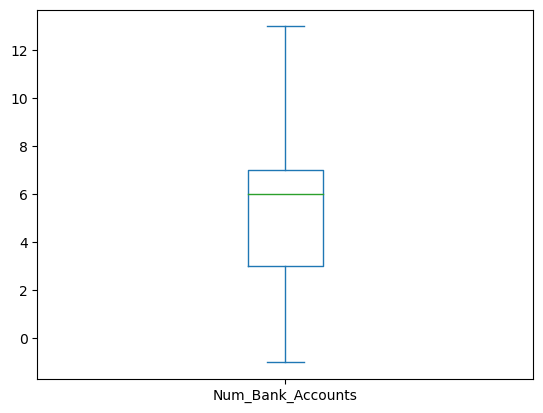

In [50]:
cap_outliers(df_['Num_Bank_Accounts']).plot(kind='box')

In [51]:
cap_outliers(df_['Num_Bank_Accounts'].describe())

count    1336.304530
mean       17.102352
std       117.562416
min        -1.000000
25%         3.000000
50%         6.000000
75%         7.000000
max      1336.304530
Name: Num_Bank_Accounts, dtype: float64

In [52]:
df_.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,89847.0,3.333063e+01,1.077556e+01,1.400000e+01,24.000000,33.000000,42.000000,100.000000
Annual_Income,89847.0,5.128037e+04,3.871925e+04,7.005930e+03,19438.857500,37577.820000,72886.080000,153056.913750
Monthly_Inhand_Salary,76371.0,4.193837e+03,3.183365e+03,3.036454e+02,1625.165833,3091.260833,5966.625000,15204.633333
Num_Bank_Accounts,89847.0,1.710235e+01,1.175624e+02,-1.000000e+00,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,89847.0,2.245798e+01,1.288654e+02,0.000000e+00,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,89847.0,7.267257e+01,4.683025e+02,1.000000e+00,8.000000,13.000000,20.000000,5797.000000
Num_of_Loan,89847.0,2.901733e+00,6.141066e+01,-1.000000e+02,1.000000,3.000000,5.000000,1496.000000
Delay_from_due_date,89847.0,2.107992e+01,1.487856e+01,-5.000000e+00,10.000000,18.000000,28.000000,67.000000
Num_of_Delayed_Payment,83590.0,3.105355e+01,2.270144e+02,-3.000000e+00,9.000000,14.000000,18.000000,4397.000000
Changed_Credit_Limit,87956.0,1.040223e+01,6.792243e+00,-6.450000e+00,5.350000,9.420000,14.880000,36.970000


In [53]:
# df_['Monthly_Inhand_Salary'] = cap_outliers(df_['Monthly_Inhand_Salary'])

In [54]:
df_ = df_.loc[(df_['Num_Bank_Accounts'] > 0) & (df_['Num_Bank_Accounts'] <= 20)]

In [57]:
df_['Num_Bank_Accounts']

0        3
1        3
3        3
4        3
6        3
        ..
99994    4
99995    4
99996    4
99997    4
99998    4
Name: Num_Bank_Accounts, Length: 84743, dtype: int64

In [58]:
df_.loc[:, 'Num_Bank_Accounts'] = df_['Num_Bank_Accounts'].round(0)

In [60]:
df_.loc[:, 'Num_Credit_Card'] = cap_outliers(df_['Num_Credit_Card']).round(0)

In [63]:
df_.loc[:, 'Interest_Rate'] = cap_outliers(df_['Interest_Rate'])

In [64]:
df_ = df_.loc[(df_['Num_of_Loan'] > 0) & (df_['Num_of_Loan'] < 20)]

In [66]:
df_['Delay_from_due_date'].describe()

count    72223.000000
mean        22.557523
std         15.294675
min         -5.000000
25%         11.000000
50%         20.000000
75%         29.000000
max         67.000000
Name: Delay_from_due_date, dtype: float64

In [67]:
df_['Delay_from_due_date'] = cap_outliers(df_['Delay_from_due_date'])

In [68]:
df_ = df_[df_['Num_of_Delayed_Payment'] >= 0]

In [69]:
df_.loc[:, 'Num_of_Delayed_Payment'] = cap_outliers(df_['Num_of_Delayed_Payment'])

In [72]:
df_.loc[:, 'Total_EMI_per_month'] = cap_outliers(df_['Total_EMI_per_month']).round(0)

<Axes: xlabel='Amount_invested_monthly', ylabel='Density'>

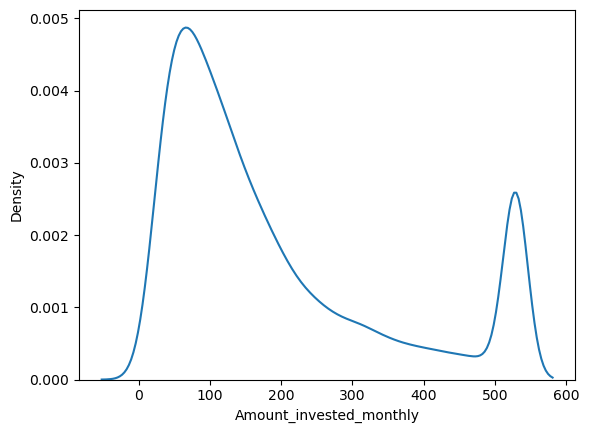

In [73]:
sns.kdeplot(cap_outliers(df_['Amount_invested_monthly']))

In [74]:
df_.loc[:, 'Amount_invested_monthly'] = cap_outliers(df_['Amount_invested_monthly'])

In [76]:
df_ = df_.loc[df_['Monthly_Balance'] > 0]

In [77]:
df_.loc[:, 'Monthly_Balance'] = cap_outliers(df_['Monthly_Balance'])

In [78]:
df_.loc[:, 'Num_Credit_Inquiries'] = cap_outliers(df_['Num_Credit_Inquiries'])

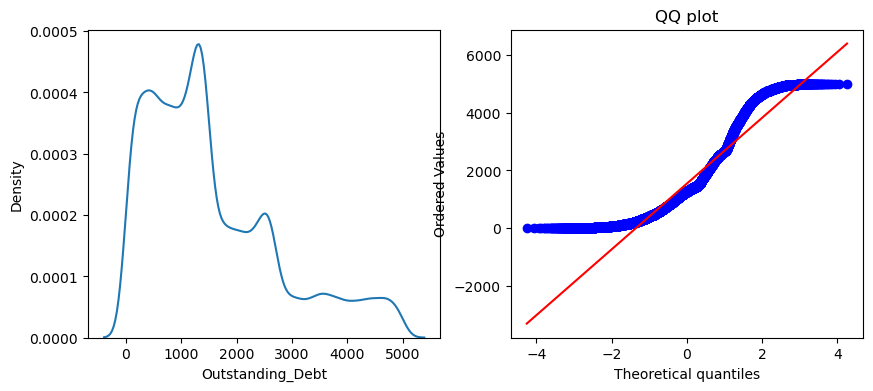

In [79]:
plt.figure(figsize=(10,4))

plt.subplot(121)
sns.kdeplot(df_['Outstanding_Debt'])

plt.subplot(122)
stats.probplot(df_['Outstanding_Debt'], dist='norm', plot=plt)
plt.title('QQ plot')

plt.show()

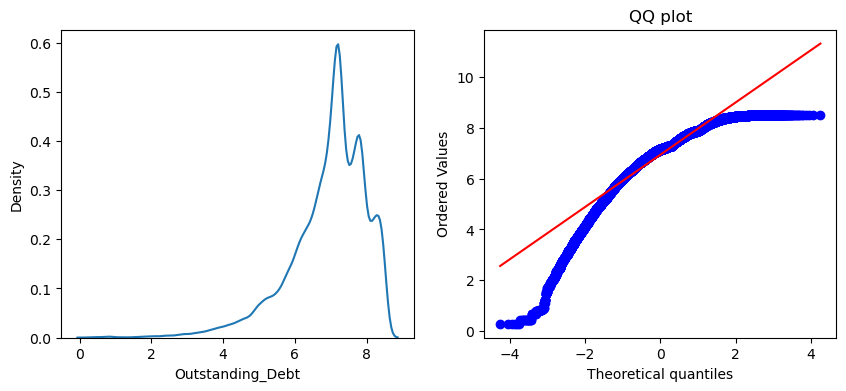

In [80]:
plt.figure(figsize=(10,4))

plt.subplot(121)
sns.kdeplot(df_['Outstanding_Debt'].apply(np.log1p))

plt.subplot(122)
stats.probplot(df_['Outstanding_Debt'].apply(np.log1p), dist='norm', plot=plt)
plt.title('QQ plot')

plt.show()

In [135]:
# not much of a differnece so we shouldnt apply log transform. 

In [81]:
df_.loc[:, 'debt_to_income'] = df_.loc[:, 'Outstanding_Debt']/df_.loc[:, 'Monthly_Inhand_Salary']

In [82]:
df_.loc[:, 'Interest_by_outstanding'] = df_.loc[:, 'Outstanding_Debt'] / df_.loc[:, 'Interest_Rate']

<Axes: xlabel='Outstanding_Debt', ylabel='Occupation'>

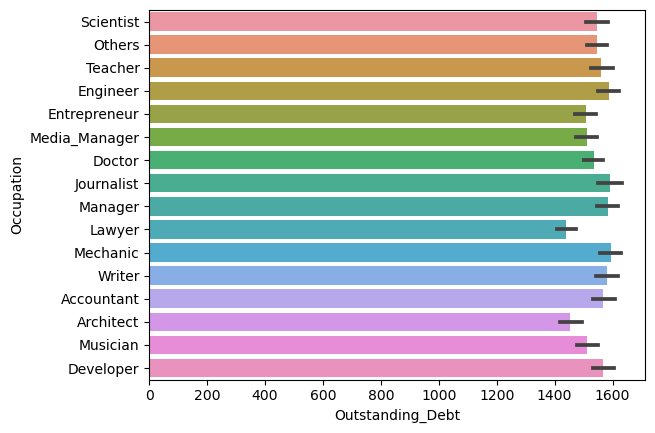

In [83]:
sns.barplot(data=df_, y='Occupation', x='Outstanding_Debt', orient='h') # similar for all the occupations

<Axes: xlabel='Month', ylabel='Num_Credit_Inquiries'>

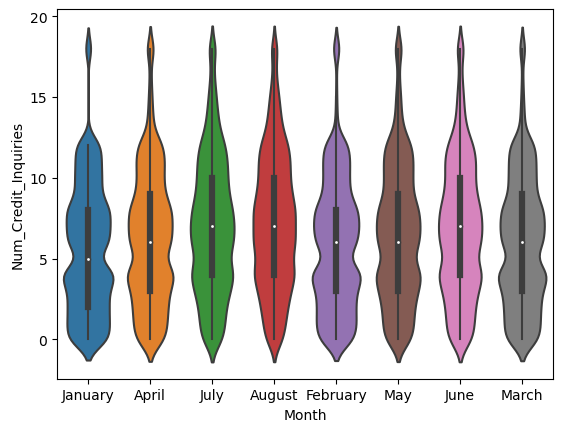

In [84]:
sns.violinplot(data=df_, x='Month', y='Num_Credit_Inquiries') 

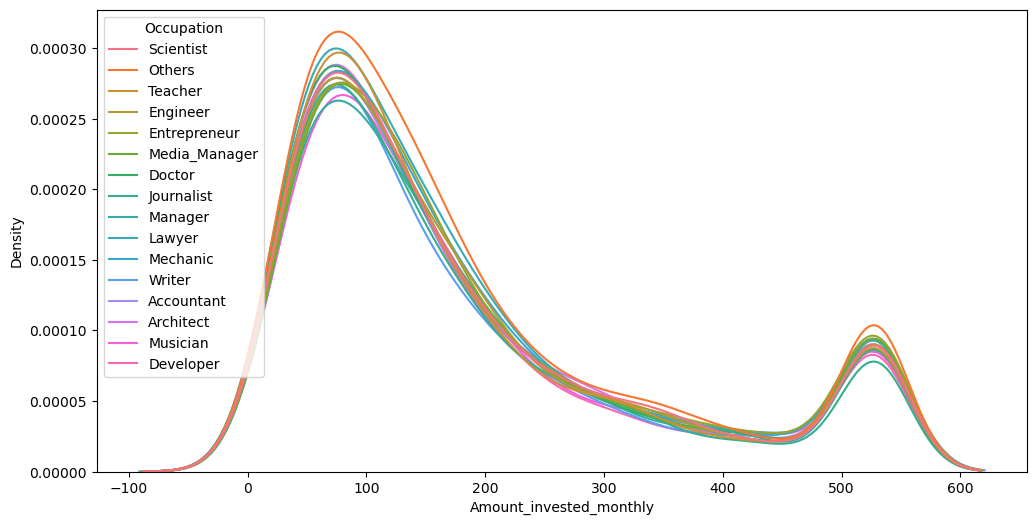

In [85]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=df_, x='Amount_invested_monthly', hue='Occupation')
plt.show()

<Axes: xlabel='Credit_History_Age', ylabel='Count'>

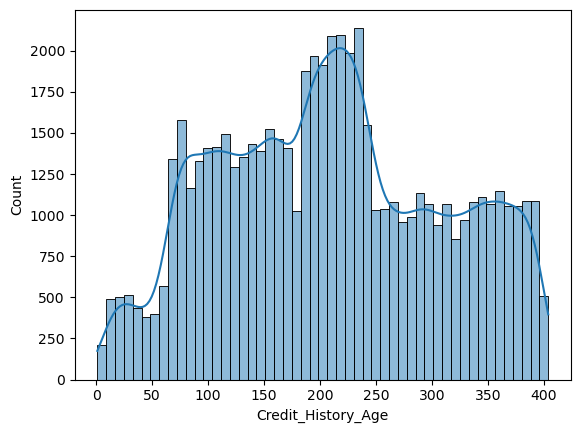

In [86]:
sns.histplot(data=df_ , x = 'Credit_History_Age', kde=True) # the spread don't show any presence of outliers. 

In [87]:
# After cleaning the data we can split it and do imputation for null values. 

In [88]:
x = df_.drop(columns=['Credit_Score'])
y = df_['Credit_Score']

In [89]:
clf_1 = ColumnTransformer([
    ('Ordinal_spent', OrdinalEncoder(categories=[['Low','High']]), ['Spent']),
    ('Ordinal_credit_mix', OrdinalEncoder(categories=[['Good', 'Standard', 'Bad']], handle_unknown='use_encoded_value', unknown_value=-1), ['Credit_Mix']),
    ('Ohe', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['Month', 'Occupation', 'Payment_of_Min_Amount', 'Value_Payments'])
], remainder='passthrough')


In [90]:
pipe = Pipeline(steps=[
    ('trf_1', clf_1),
    ('trf_2', KNNImputer(n_neighbors=5)),
    ('trf2', MinMaxScaler())
])

In [91]:
X = pipe.fit_transform(x)

In [92]:
encoder = LabelEncoder()

In [93]:
Y = encoder.fit_transform(y)

In [94]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,
                                                test_size=0.2,
                                                random_state = 42)

In [95]:
# I'll use optuna for model selection and hyper parameter tuning

In [96]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [125]:
def objective(trial):
    
    classifier_name = trial.suggest_categorical('Classifier', ['RandomForestClassifier', 'xgbc'])
    
    if classifier_name == 'RandomForestClassifier':
        n_estimator = trial.suggest_int('n_estimator', 50, 400)
        max_depth = trial.suggest_int("max_depth", 3, 20)
        min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
        min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 4)
        
        model = RandomForestClassifier(n_estimators=n_estimator,
                                      max_depth=max_depth, 
                                      min_samples_split = min_samples_split,
                                      min_samples_leaf = min_samples_leaf, 
                                      random_state=42)
    
    elif classifier_name == 'xgbc':
        n_estimators = trial.suggest_int("n_estimators", 50, 400)
        max_depth = trial.suggest_int("max_depth", 3, 20)
        learning_rate = trial.suggest_float("learning_rate", 1e-3, 0.1, log=True)
        subsample = trial.suggest_float("subsample", 0.3, 1.0)
        
        model = xgbc(n_estimators=n_estimators, 
                     max_depth=max_depth, 
                     learning_rate=learning_rate, 
                     subsample=subsample, 
                     use_label_encoder=False, 
                     eval_metric='mlogloss',
                     random_state=42)

        
    score = cross_val_score(model, x_train,y_train, cv=kfold, scoring='accuracy').mean()
    
    return score
        

In [126]:
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())

[I 2024-11-05 13:31:25,876] A new study created in memory with name: no-name-9d580ade-e65a-432f-aac8-a045722dcea8


In [127]:
study.optimize(objective, n_trials=50, n_jobs=-1)

[I 2024-11-05 13:33:33,460] Trial 11 finished with value: 0.6990719696969697 and parameters: {'Classifier': 'xgbc', 'n_estimators': 76, 'max_depth': 4, 'learning_rate': 0.0015699559154830761, 'subsample': 0.4184758491642607}. Best is trial 11 with value: 0.6990719696969697.
[I 2024-11-05 13:34:45,324] Trial 0 finished with value: 0.7076704545454545 and parameters: {'Classifier': 'xgbc', 'n_estimators': 96, 'max_depth': 5, 'learning_rate': 0.006898398595037739, 'subsample': 0.3832120737309961}. Best is trial 0 with value: 0.7076704545454545.
[I 2024-11-05 13:34:45,341] Trial 15 finished with value: 0.6989015151515152 and parameters: {'Classifier': 'xgbc', 'n_estimators': 134, 'max_depth': 3, 'learning_rate': 0.017278643969442353, 'subsample': 0.9565570894730442}. Best is trial 0 with value: 0.7076704545454545.
[I 2024-11-05 13:35:49,604] Trial 9 finished with value: 0.7069886363636364 and parameters: {'Classifier': 'RandomForestClassifier', 'n_estimator': 119, 'max_depth': 8, 'min_sampl

In [128]:
study.best_params

{'Classifier': 'xgbc',
 'n_estimators': 368,
 'max_depth': 14,
 'learning_rate': 0.05993877788307553,
 'subsample': 0.9560212243384361}

In [129]:
study.best_value

0.792689393939394

In [164]:
xgb_classifier = xgbc(n_estimators=368, max_depth=14, learning_rate=0.05993877788307553, subsample=0.9560212243384361)

In [150]:
df_['Credit_Score'].value_counts()

Credit_Score
Standard    35216
Poor        21098
Good         9687
Name: count, dtype: int64

In [152]:
dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

{'Good': 0, 'Poor': 1, 'Standard': 2}

In [167]:
y_train_series = pd.Series(y_train)

In [169]:
weights = y_train_series.map({0:2.5, 1:1.5, 2:1})

In [182]:
xgb_classifier.fit(x_train, y_train, sample_weight=weights)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05993877788307553,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=14, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=368, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [183]:
y_pred = xgb_classifier.predict(x_test)

In [184]:
accuracy_score(y_test, y_pred)

0.8023634573138398

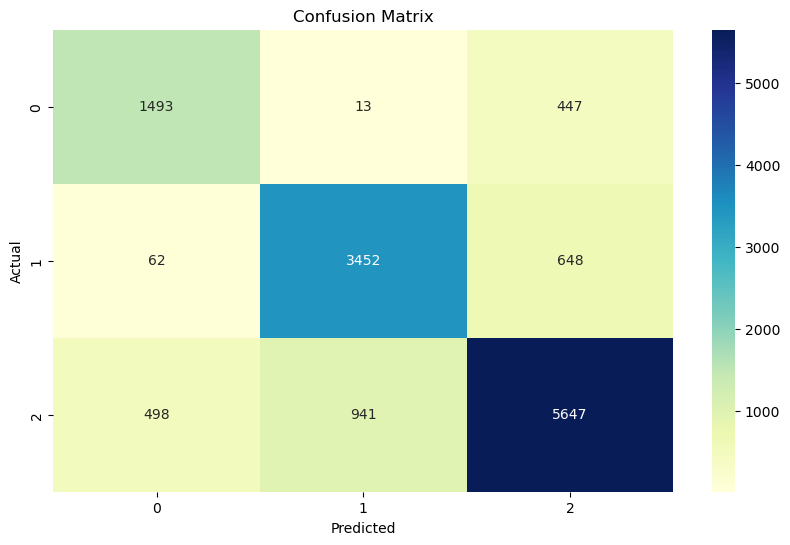

In [185]:
plt.figure(figsize=(10,6))
conf_mtrx = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mtrx, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [161]:
df_['Credit_Score'].value_counts()

Credit_Score
Standard    35216
Poor        21098
Good         9687
Name: count, dtype: int64

In [144]:
dict(zip(encoder.classes_ ,encoder.transform(encoder.classes_)))

{'Good': 0, 'Poor': 1, 'Standard': 2}

In [115]:
# I tried another algorithm Light Gradient Boosting for this classification

In [97]:
def objective_lgbm(trial):
    n_estimators = trial.suggest_int("n_estimators", 500, 2000)
    num_leaves = trial.suggest_int("num_leaves", 20, 100)
    max_depth = trial.suggest_int("max_depth", -1, 20)
    learning_rate = trial.suggest_float("learning_rate", 1e-3, 0.1, log=True)
    min_child_samples = trial.suggest_int("min_child_samples", 5, 50)
    subsample = trial.suggest_float("subsample", 0.5, 1.0)
    colsample_bytree = trial.suggest_float("colsample_bytree", 0.5, 1.0)
    reg_alpha = trial.suggest_float("reg_alpha", 1e-4, 1.0, log=True)
    reg_lambda = trial.suggest_float("reg_lambda", 1e-4, 1.0, log=True)
    
    model = LGBMClassifier(n_estimators=n_estimators, num_leaves=num_leaves, max_depth=max_depth,
                           learning_rate=learning_rate, min_child_samples=min_child_samples, 
                           subsample=subsample, colsample_bytree=colsample_bytree, reg_alpha=reg_alpha,
                           reg_lambda=reg_lambda)
        
    score = cross_val_score(model, x_train,y_train, cv=kfold, scoring='accuracy').mean()
    return score

In [98]:
study_2 = optuna.create_study(direction='maximize', sampler=optuna.samplers.RandomSampler())

[I 2024-11-05 00:31:27,147] A new study created in memory with name: no-name-d3513849-e807-42e9-8ec5-fe59f312be66


In [99]:
study_2.optimize(objective_lgbm, n_trials=30, n_jobs=-1)

[I 2024-11-05 00:33:41,697] Trial 13 finished with value: 0.6237121212121213 and parameters: {'n_estimators': 1716, 'num_leaves': 70, 'max_depth': 1, 'learning_rate': 0.001155776572605237, 'min_child_samples': 11, 'subsample': 0.601345951661117, 'colsample_bytree': 0.8931110947731657, 'reg_alpha': 0.22856786062430337, 'reg_lambda': 0.00011523290994608239}. Best is trial 13 with value: 0.6237121212121213.
[I 2024-11-05 00:35:19,878] Trial 11 finished with value: 0.7247537878787879 and parameters: {'n_estimators': 995, 'num_leaves': 21, 'max_depth': 3, 'learning_rate': 0.0322431593591833, 'min_child_samples': 23, 'subsample': 0.9844591426620368, 'colsample_bytree': 0.7178509557488804, 'reg_alpha': 0.001281704069102627, 'reg_lambda': 0.00023604012158217268}. Best is trial 11 with value: 0.7247537878787879.
[I 2024-11-05 00:35:52,306] Trial 0 finished with value: 0.7254166666666666 and parameters: {'n_estimators': 1204, 'num_leaves': 93, 'max_depth': 3, 'learning_rate': 0.02630306587844770

In [100]:
study_2.best_params

{'n_estimators': 1259,
 'num_leaves': 66,
 'max_depth': 19,
 'learning_rate': 0.07452080630548898,
 'min_child_samples': 7,
 'subsample': 0.9969768911384491,
 'colsample_bytree': 0.5285334180143082,
 'reg_alpha': 0.018100817420337867,
 'reg_lambda': 0.00013816675633613923}

In [101]:
study_2.best_value

0.7938825757575757

In [153]:
lgbm_classifier = LGBMClassifier(n_estimators=1259, num_leaves=66, max_depth=19, learning_rate=0.07452080630548898,
              min_child_samples=7, subsample=0.9969768911384491, colsample_bytree=0.5285334180143082,
              reg_alpha=0.018100817420337867, reg_lambda=0.00013816675633613923, class_weight={0:2.5, 1:1.5, 2:1})

In [154]:
lgbm_classifier.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008947 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3150
[LightGBM] [Info] Number of data points in the train set: 52800, number of used features: 51
[LightGBM] [Info] Start training from score -1.326746
[LightGBM] [Info] Start training from score -1.053757
[LightGBM] [Info] Start training from score -0.951827


LGBMClassifier(class_weight={0: 2.5, 1: 1.5, 2: 1},
               colsample_bytree=0.5285334180143082,
               learning_rate=0.07452080630548898, max_depth=19,
               min_child_samples=7, n_estimators=1259, num_leaves=66,
               reg_alpha=0.018100817420337867,
               reg_lambda=0.00013816675633613923, subsample=0.9969768911384491)

In [155]:
y_pred_2 = lgbm_classifier.predict(x_test)

In [156]:
accuracy_score(y_test, y_pred_2)

0.8112264222407394

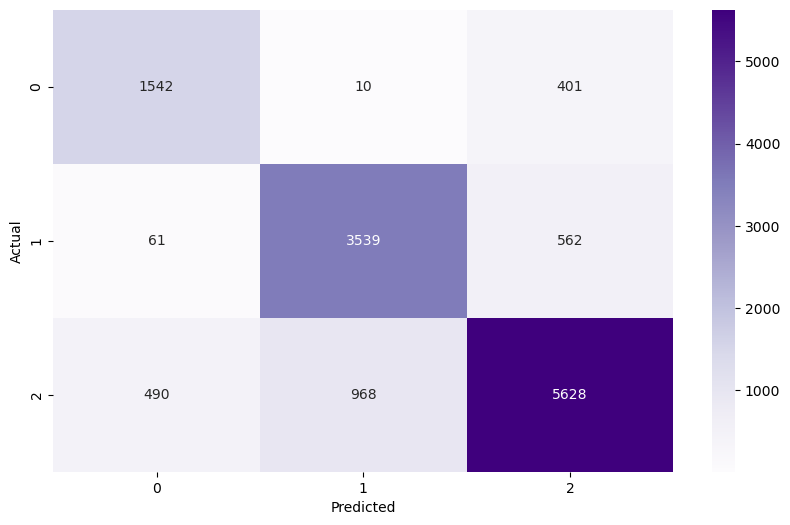

In [157]:
plt.figure(figsize=(10,6))
cnf_mtrx_2 = confusion_matrix(y_test, y_pred_2)
sns.heatmap(cnf_mtrx_2, annot=True, fmt='d' ,cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [158]:
from sklearn.metrics import classification_report

In [186]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75      1953
           1       0.78      0.83      0.81      4162
           2       0.84      0.80      0.82      7086

    accuracy                           0.80     13201
   macro avg       0.78      0.80      0.79     13201
weighted avg       0.80      0.80      0.80     13201



In [159]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76      1953
           1       0.78      0.85      0.82      4162
           2       0.85      0.79      0.82      7086

    accuracy                           0.81     13201
   macro avg       0.79      0.81      0.80     13201
weighted avg       0.81      0.81      0.81     13201



In [117]:
# Light Gradient Boosting Machine is giving better accuracy so we will consider that algorithm